In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
%matplotlib inline

In [103]:
matches=pd.read_csv("V:/DSP/Datasets/2017.csv")

In [104]:
matches.head()

,id,season,city,team1,team2,toss_winner,winner,Bat1,Bat2,Bat3,...,Bowl2,Bowl3,Bowl4,Bowl5,Bowl6,Bowl7,Bowl8,Bowl9,Bowl10,Bowl11
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,-0.401919681,6.105913,0.862923,...,3.90625,5.088333,16.001500,-9.568917,13.953500,-11.401500,-5.305000,7.348083,0.923917,3.426500
1,2,2017,Pune,Rising Pune Supergiant,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,5.022981997,-2.643039,0.353027,...,0.00000,-16.280500,15.662167,-6.375000,-2.522083,0.765750,0.193750,-10.777083,-0.968333,4.701667
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,-2.980953268,-1.400565,1.987580,...,6.50000,5.643000,-5.729167,-10.567500,15.056417,-4.360833,-4.651500,-1.734167,-2.456083,-8.867833
3,4,2017,Indore,Kings XI Punjab,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1.165676237,3.376942,-3.365123,...,3.25000,3.250000,1.649083,4.850000,-0.711250,-0.889583,-19.199667,3.678750,-0.758333,-17.482500
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,12.27049575,5.593676,-1.944253,...,19.95725,0.000000,0.000000,17.901500,-20.362500,4.186000,2.047167,-5.936583,7.353333,-6.982417


In [105]:
matches[pd.isnull(matches['winner'])]

,id,season,city,team1,team2,toss_winner,winner,Bat1,Bat2,Bat3,...,Bowl2,Bowl3,Bowl4,Bowl5,Bowl6,Bowl7,Bowl8,Bowl9,Bowl10,Bowl11


In [106]:
matches['winner'].fillna('Draw', inplace=True)

In [108]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,team1,team2,toss_winner,winner,Bat1,Bat2,Bat3,...,Bowl2,Bowl3,Bowl4,Bowl5,Bowl6,Bowl7,Bowl8,Bowl9,Bowl10,Bowl11
0,1,2017,Hyderabad,10,3,3,10,-0.401919681,6.105913,0.862923,...,3.90625,5.088333,16.001500,-9.568917,13.953500,-11.40150,-5.30500,7.348083,0.923917,3.426500
1,2,2017,Pune,11,1,11,11,5.022981997,-2.643039,0.353027,...,0.00000,-16.280500,15.662167,-6.375000,-2.522083,0.76575,0.19375,-10.777083,-0.968333,4.701667


In [109]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,team1,team2,toss_winner,winner,Bat1,Bat2,Bat3,...,Bowl2,Bowl3,Bowl4,Bowl5,Bowl6,Bowl7,Bowl8,Bowl9,Bowl10,Bowl11


In [110]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null
matches['city'].fillna('Dubai',inplace=True)
matches.describe()

,id,season,team1,team2,toss_winner,winner,Bat2,Bat3,Bat4,Bat5,...,Bowl2,Bowl3,Bowl4,Bowl5,Bowl6,Bowl7,Bowl8,Bowl9,Bowl10,Bowl11
count,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,2017.0,6.237288,6.186441,5.423729,6.203390,0.992592,0.630589,0.858332,-0.135332,...,0.231296,-3.220346,1.256200,0.684934,1.431217,-0.654407,-3.033001,0.104866,0.197763,-0.656597
std,17.175564,0.0,3.724749,3.748446,3.672843,4.007664,4.745847,4.274221,4.092999,4.275126,...,6.803764,8.675183,10.525660,10.481132,9.982192,8.758050,8.503923,8.570351,9.247948,11.547162
min,1.000000,2017.0,1.000000,1.000000,1.000000,1.000000,-8.577843,-8.587876,-12.344181,-8.435941,...,-16.529167,-32.500000,-19.530500,-22.401000,-25.959208,-29.517417,-33.075625,-36.633833,-40.192042,-43.750250
25%,15.500000,2017.0,2.000000,2.000000,2.000000,2.000000,-2.422111,-1.929634,-1.211258,-2.800346,...,-3.578125,-9.127958,-4.508333,-7.803583,-3.881958,-3.546167,-5.321458,-2.592125,-1.785667,-6.569958
50%,30.000000,2017.0,7.000000,7.000000,7.000000,7.000000,0.491040,0.353027,0.193046,-0.382097,...,0.000000,-3.250000,0.000000,0.091417,1.756500,-0.889583,-0.686417,0.191667,-0.657000,-0.888833
75%,44.500000,2017.0,9.500000,9.500000,8.500000,10.000000,3.983363,2.006077,2.856756,2.347716,...,3.578125,2.562500,9.658542,9.909458,8.721542,2.150208,1.716417,5.582125,4.013208,3.628250
max,59.000000,2017.0,11.000000,11.000000,11.000000,11.000000,13.504195,14.145780,16.188571,16.036772,...,19.957250,16.280500,19.530500,17.901500,16.081667,19.089167,20.217167,17.643750,21.848500,29.601250


In [79]:
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [111]:

matches.head(2)

,id,season,city,team1,team2,toss_winner,winner,Bat1,Bat2,Bat3,...,Bowl2,Bowl3,Bowl4,Bowl5,Bowl6,Bowl7,Bowl8,Bowl9,Bowl10,Bowl11
0,1,2017,Hyderabad,10,3,3,10,-0.401919681,6.105913,0.862923,...,3.90625,5.088333,16.001500,-9.568917,13.953500,-11.40150,-5.30500,7.348083,0.923917,3.426500
1,2,2017,Pune,11,1,11,11,5.022981997,-2.643039,0.353027,...,0.00000,-16.280500,15.662167,-6.375000,-2.522083,0.76575,0.19375,-10.777083,-0.968333,4.701667


In [112]:
df = pd.DataFrame(matches)
df.describe()

,id,season,team1,team2,toss_winner,winner,Bat2,Bat3,Bat4,Bat5,...,Bowl2,Bowl3,Bowl4,Bowl5,Bowl6,Bowl7,Bowl8,Bowl9,Bowl10,Bowl11
count,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,2017.0,6.237288,6.186441,5.423729,6.203390,0.992592,0.630589,0.858332,-0.135332,...,0.231296,-3.220346,1.256200,0.684934,1.431217,-0.654407,-3.033001,0.104866,0.197763,-0.656597
std,17.175564,0.0,3.724749,3.748446,3.672843,4.007664,4.745847,4.274221,4.092999,4.275126,...,6.803764,8.675183,10.525660,10.481132,9.982192,8.758050,8.503923,8.570351,9.247948,11.547162
min,1.000000,2017.0,1.000000,1.000000,1.000000,1.000000,-8.577843,-8.587876,-12.344181,-8.435941,...,-16.529167,-32.500000,-19.530500,-22.401000,-25.959208,-29.517417,-33.075625,-36.633833,-40.192042,-43.750250
25%,15.500000,2017.0,2.000000,2.000000,2.000000,2.000000,-2.422111,-1.929634,-1.211258,-2.800346,...,-3.578125,-9.127958,-4.508333,-7.803583,-3.881958,-3.546167,-5.321458,-2.592125,-1.785667,-6.569958
50%,30.000000,2017.0,7.000000,7.000000,7.000000,7.000000,0.491040,0.353027,0.193046,-0.382097,...,0.000000,-3.250000,0.000000,0.091417,1.756500,-0.889583,-0.686417,0.191667,-0.657000,-0.888833
75%,44.500000,2017.0,9.500000,9.500000,8.500000,10.000000,3.983363,2.006077,2.856756,2.347716,...,3.578125,2.562500,9.658542,9.909458,8.721542,2.150208,1.716417,5.582125,4.013208,3.628250
max,59.000000,2017.0,11.000000,11.000000,11.000000,11.000000,13.504195,14.145780,16.188571,16.036772,...,19.957250,16.280500,19.530500,17.901500,16.081667,19.089167,20.217167,17.643750,21.848500,29.601250


In [82]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 11
RCB -> 9
KKR -> 9
DD -> 8
GL -> 7
RPS -> 6
SRH -> 5
KXIP -> 4
No of match winners by each team
MI -> 12
RPS -> 10
KKR -> 9
SRH -> 8
KXIP -> 7
DD -> 6
GL -> 4
RCB -> 3


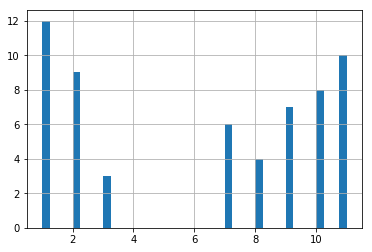

In [83]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=40)

Text(0.5,1,'Match winners')

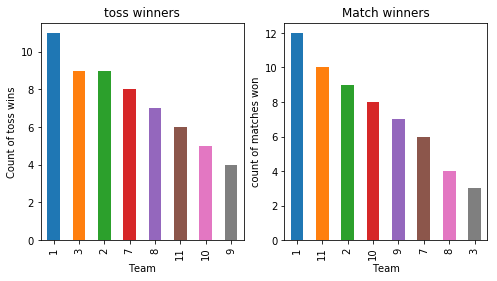

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [84]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

id             0
season         0
city           0
date           0
team1          0
team2          0
toss_winner    0
winner         0
Bat1           0
Bat2           0
Bat3           0
Bat4           0
Bat5           0
Bat6           0
Bat7           0
Bat8           0
Bat9           0
Bat10          0
Bat11          0
Bowl1          0
Bowl2          0
Bowl3          0
Bowl4          0
Bowl5          0
Bowl6          0
Bowl7          0
Bowl8          0
Bowl9          0
Bowl10         0
Bowl11         0
dtype: int64

In [113]:
#Find cities which are null
df[pd.isnull(df['city'])]

,id,season,city,team1,team2,toss_winner,winner,Bat1,Bat2,Bat3,...,Bowl2,Bowl3,Bowl4,Bowl5,Bowl6,Bowl7,Bowl8,Bowl9,Bowl10,Bowl11


In [114]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['team1','team2','city','Bat1','Bat2','Bat3','Bat4','Bat5','Bat6','Bat7','Bat8','Bat9','Bat10','Bat11','Bowl1','Bowl2','Bowl3','Bowl4','Bowl5','Bowl6','Bowl7','Bowl8','Bowl9','Bowl10','Bowl11'
]
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

id             int64
season         int64
city           int64
team1          int64
team2          int64
toss_winner    int64
winner         int64
Bat1           int64
Bat2           int64
Bat3           int64
Bat4           int64
Bat5           int64
Bat6           int64
Bat7           int64
Bat8           int64
Bat9           int64
Bat10          int64
Bat11          int64
Bowl1          int64
Bowl2          int64
Bowl3          int64
Bowl4          int64
Bowl5          int64
Bowl6          int64
Bowl7          int64
Bowl8          int64
Bowl9          int64
Bowl10         int64
Bowl11         int64
dtype: object

In [115]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_folds=7)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

In [121]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['city','team1','team2','Bat1','Bat2','Bat3','Bat4','Bat5','Bat6','Bat7','Bat8','Bat9','Bat10','Bat11','Bowl1','Bowl2','Bowl3','Bowl4','Bowl5','Bowl6','Bowl7','Bowl8','Bowl9','Bowl10','Bowl11']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 6.746%


C:\Users\vinut\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['Bat1','Bat2','Bat3','Bat4','Bat5','Bat6','Bat7','Bat8','Bat9','Bat10','Bat11','Bowl1','Bowl2','Bowl3','Bowl4','Bowl5','Bowl6','Bowl7','Bowl8','Bowl9','Bowl10','Bowl11']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\vinut\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vinut\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy : 100.000%


C:\Users\vinut\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\vinut\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\vinut\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\vinut\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\vinut\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vec

Cross-Validation Score : 18.452%


C:\Users\vinut\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
